# Reproducibility: Setting the seed

With the aim to ensure reproducibility between runs of the same notebook, but also between the research and production environment, for each step that includes some element of randomness, it is extremely important that we set the seed.

In [99]:
# data manipulation and plotting
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# for saving the pipeline
import joblib

# from Scikit-learn
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, Binarizer

# from feature-engine
# from feature_engine.imputation import (
#     AddMissingIndicator,
#     MeanMedianImputer,
#     CategoricalImputer,
# )

# from feature_engine.encoding import (
#     RareLabelEncoder,
#     OrdinalEncoder,
# )

from feature_engine.transformation import (
    LogTransformer,
    YeoJohnsonTransformer,
)

from feature_engine.selection import DropFeatures
#from feature_engine.wrappers import SklearnTransformerWrapper

#import preprocessors as pp

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [92]:
# load dataset
data = pd.read_csv('seoul.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(960113, 26)


,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,14,11,1800,37.525650,126.887817,37.535961,126.898300,1.472768,1,1,0,5,0,1,1,0,17,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,43,14,2280,37.554859,126.936157,37.549904,126.955147,1.762402,1,1,0,17,0,1,1,0,31,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,49,13,2160,37.531860,127.067192,37.539654,127.052589,1.552109,1,1,0,17,0,1,1,0,32,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,61,20,5250,37.484661,126.903900,37.507332,126.879730,3.301778,1,1,0,21,0,1,1,0,42,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,65,3,630,37.479916,126.902840,37.483192,126.902031,0.371204,1,1,0,22,0,1,1,0,26,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


56

In [93]:
for i in data.columns:
    print(i,(data[i]==0).sum())

Unnamed: 0 0
Duration 0
Distance 0
PLong 0
PLatd 0
DLong 0
DLatd 0
Haversine 95850
Pmonth 0
Pday 0
Phour 31373
Pmin 14941
PDweek 136776
Dmonth 0
Dday 0
Dhour 35217
Dmin 15548
DDweek 136607
Temp 301
Precip 948460
Wind 4023
Humid 0
Solar 344242
Snow 953197
GroundTemp 5438
Dust 23505


In [ ]:
['Precip','Unnamed: 0','Snow','Solar']

In [94]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Duration' ], axis=1), # predictive variables
    data['Duration'], # target
    test_size=0.1, # portion of dataset to allocate to test set
    random_state=42, # we are setting the seed here
)

X_train.shape, X_test.shape

((864101, 25), (96012, 25))

In [76]:
X_train[continuous_feature].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864101 entries, 64895 to 121958
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Temp        864101 non-null  float64
 1   Wind        864101 non-null  float64
 2   Humid       864101 non-null  float64
 3   Solar       864101 non-null  float64
 4   GroundTemp  864101 non-null  float64
 5   Dust        864101 non-null  float64
dtypes: float64(6)
memory usage: 46.1 MB


ValueError: supplied range of [-inf, 3.673765816303888] is not finite

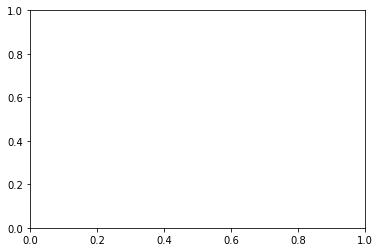

In [86]:
continuous_feature = ['Temp', 'Wind', 'Humid', 'Solar', 'GroundTemp', 'Dust']
for var in continuous_feature:
    
    data[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel("Count")

    #xticks(rotation = 90)

    plt.show()

# Target

In [6]:
y_train = np.log(y_train)
y_test = np.log(y_test)

array([[<AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Humid'}>,
        <AxesSubplot:title={'center':'Solar'}>],
       [<AxesSubplot:title={'center':'GroundTemp'}>,
        <AxesSubplot:title={'center':'Dust'}>]], dtype=object)

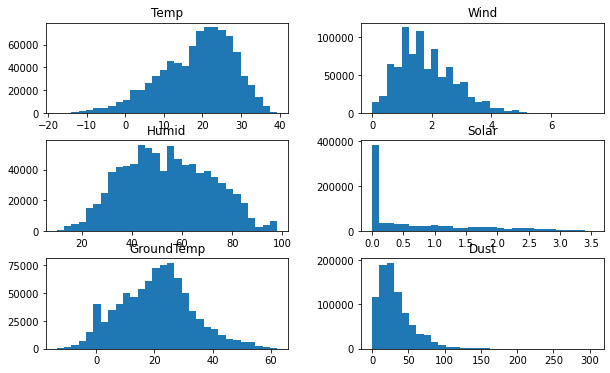

In [77]:
X_train[continuous_feature].hist(grid=False,
       figsize=(10, 6),
       bins=30)

Since we don't have any categorical data or missing data to impute. And there is not data encode neither we have assign any valuse. So we will skip it for now.

33990

# Config

In [108]:
# variables to Drop
REF_VAR = ['Precip','Unnamed: 0','Snow','Solar']

# Pipeline - Feature engineering

In [109]:
dur_pipe = Pipeline([('drop_features', DropFeatures(features_to_drop=REF_VAR))])

In [110]:
dur_pipe.fit(X_train, y_train)

Pipeline(steps=[('drop_features',
                 DropFeatures(features_to_drop=['Precip', 'Unnamed: 0', 'Snow',
                                                'Solar']))])

In [112]:
X_train = dur_pipe.transform(X_train)
X_test = dur_pipe.transform(X_test)

In [113]:
# check absence of na in the test set
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

In [114]:
X_train.head()

,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,Pmin,PDweek,Dmonth,Dday,Dhour,Dmin,DDweek,Temp,Wind,Humid,GroundTemp,Dust
64895,5660,37.577995,126.891472,37.559795,126.934479,4.296864,3,26,18,16,0,3,26,18,50,0,16.0,2.9,33.0,14.2,81.0
706416,790,37.536808,127.055489,37.539654,127.052589,0.406853,10,6,17,18,5,10,6,17,27,5,21.1,1.2,64.0,20.5,9.0
372395,5920,37.517368,126.929253,37.502178,126.948204,2.376360,7,10,21,44,1,7,10,22,15,1,25.1,0.3,86.0,24.0,34.0
915528,620,37.533688,126.902107,37.530079,126.905708,0.511734,12,2,18,48,6,12,2,18,52,6,10.4,1.1,52.0,6.8,46.0
835868,1310,37.569260,126.848419,37.561035,126.854813,1.074273,11,5,10,41,0,11,5,10,50,0,11.8,0.9,59.0,14.9,66.0
